# Assignment Python 3 - Bank Marketing Data Set

**Nama: Shendy Krisyohanda**  
**Kode Peserta: PYTN-KS08-21**  
***MSIB Batch 3***

## Prepping Data

Import Pustaka yang dibutuhkan:

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import LabelEncoder
from sklearn import preprocessing
# Import train test split
from sklearn.model_selection import train_test_split
# Import library logistic regression
from sklearn.linear_model import LogisticRegression
# Import library k-nearest neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Import library support vector machine (SVM)
from sklearn.svm import SVC
# Import library decision tree
from sklearn.tree import DecisionTreeClassifier
# Import library random forest
from sklearn.ensemble import RandomForestClassifier
# Import library naive bayes
from sklearn.naive_bayes import GaussianNB
# Import library confussion matrix
from sklearn.metrics import confusion_matrix
# Import library mendapatkan accuracy score
from sklearn.metrics import accuracy_score

Mengambil dataset bank-additional-full.csv di folder dataset.

In [64]:
df = pd.read_csv('dataset/bank-additional-full.csv', sep=';')

Menampilkan 5 baris data teratas menggunakan fungsi `head()`.

In [65]:
pd.set_option("display.max.columns", None) # menampilkan semua kolom
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Menampilkan 5 baris data terbawah menggunakan fungsi `tail()`.

In [66]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Mengetahui jumlah total baris dan kolom dalam kumpulan data menggunakan `.shape`.

In [67]:
df.shape #(row, column)

(41188, 21)

Terdapat **41.118 baris** dan **21 kolom** dalam dataset/kumpulan data.  
Melihat informasi tipe data pada tiap kolom menggunakan `info()`.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Terdapat *5* kolom bertipe data `float64`, **5** kolom bertipe `int64`, dan **11** kolom bertipe `object`.  
Memeriksa missing values menggunakan `df.isnull().values.any()`.

In [69]:
df.isnull().values.any()

False

Mari membuat visualisasi data tentang jenis pekerjaan klien bank.

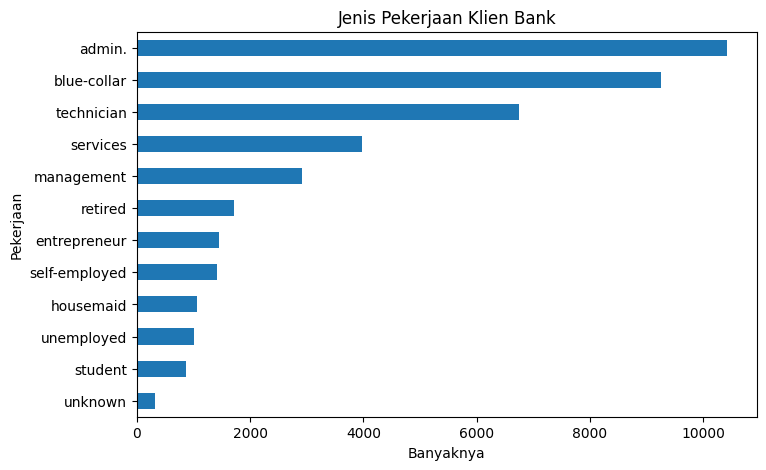

In [70]:
df['job'].value_counts().sort_values().plot(kind='barh', figsize=(8,5))

plt.title('Jenis Pekerjaan Klien Bank')
plt.xlabel("Banyaknya")
plt.ylabel("Pekerjaan")
plt.show()

Ada 13 jenis pekerjaan klien bank dan jumlah klien bank terbanyak bekerja sebagai `admin`.  
Mengetahui hubungan antara usia dan seberapa lama durasi panggilan menggunakan scatter plot.

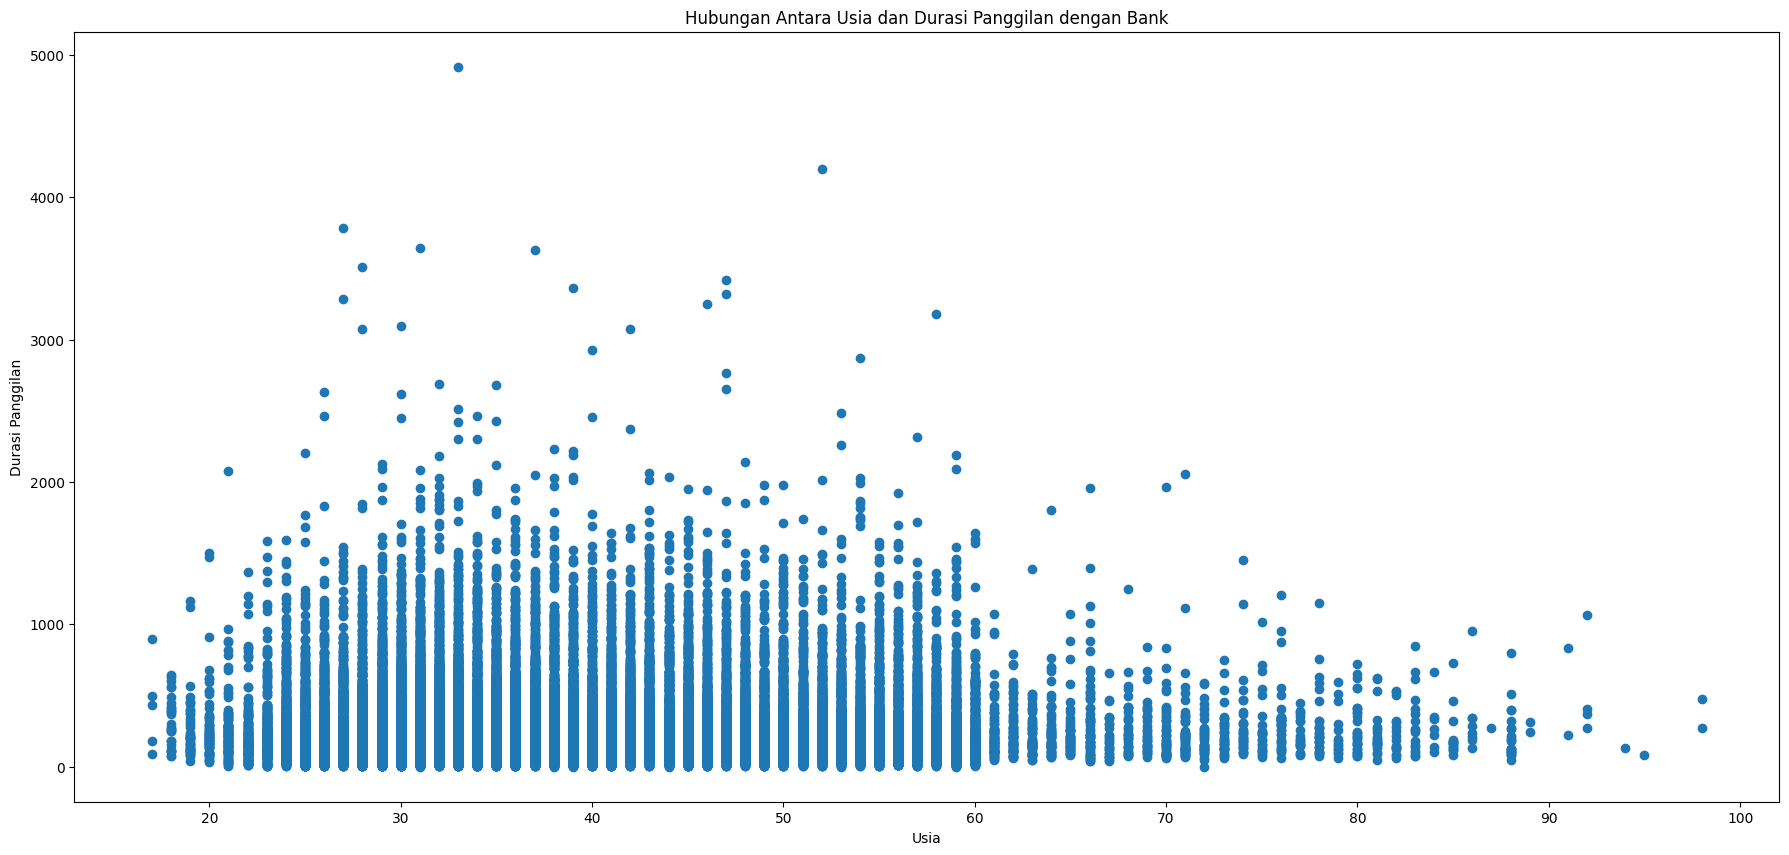

In [71]:
age = df['age']
duration = df['duration']

plt.figure(figsize=(22,10))
plt.scatter(age, duration)
plt.title("Hubungan Antara Usia dan Durasi Panggilan dengan Bank")
plt.xlabel("Usia")
plt.ylabel("Durasi Panggilan")
plt.show()

Pada usia 60 ke atas durasi panggilan cenderung makin singkat.  
***Encoding data columns***   
Berbagai machine learning algoritma memerlukan data input numerik, jadi kita perlu merepresentasikan kolom kategorikal dalam kolom numerik. Berdasarkan `df.info()` ada 11 kolom yang berkategori objek dan harus kita ubah menjadi kolom numerik.

In [72]:
#creating labelEncoder
label_encoder = preprocessing.LabelEncoder()

df_category = df.select_dtypes(include='object')
encode_df = df.copy()

for column in df_category.columns:
    encode_df[column] = label_encoder.fit_transform(df[column])

Pada cell di atas, membuat objek Label Encoder. Dengan menggunakan objek LabelEncoder ini, dapat menyesuaikan dan mengubah kolom berkategori objek menjadi kolom numerik.

In [73]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [74]:
encode_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Sekarang sudah tidak ada lagi kolom yang berkategori objek.  
Standardization adalah proses mengubah data sedemikian rupa sehingga mean tiap kolom menjadi sama dengan nol, dan standard deviation tiap kolom adalah satu. Dengan cara ini, kita mendapatkan skala yang sama untuk semua kolom.

In [75]:
scaler = preprocessing.StandardScaler()
scale_df = encode_df.copy()
numeric_df = df.select_dtypes(include=['int64','float64'])
for column in numeric_df.columns:
  scale_df[column] = scaler.fit_transform(df[column].values.reshape(-1,1))

In [76]:
scale_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,3,1,0,0,0,0,1,6,1,0.010471,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,7,1,3,1,0,0,1,6,1,-0.421501,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,7,1,3,0,2,0,1,6,1,-0.124520,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,0,1,1,0,0,0,1,6,1,-0.413787,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,7,1,3,0,0,2,1,6,1,0.187888,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,0


Membuat fungsi untuk memeriksa relasi pada tiap kolom.

In [77]:
def plot_corr(df, size=27):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

Memanggil fungsi plot_corr dan memasukkan scale_df sebagai parameter untuk menampilkan relasi tiap kolom pada scale_df.

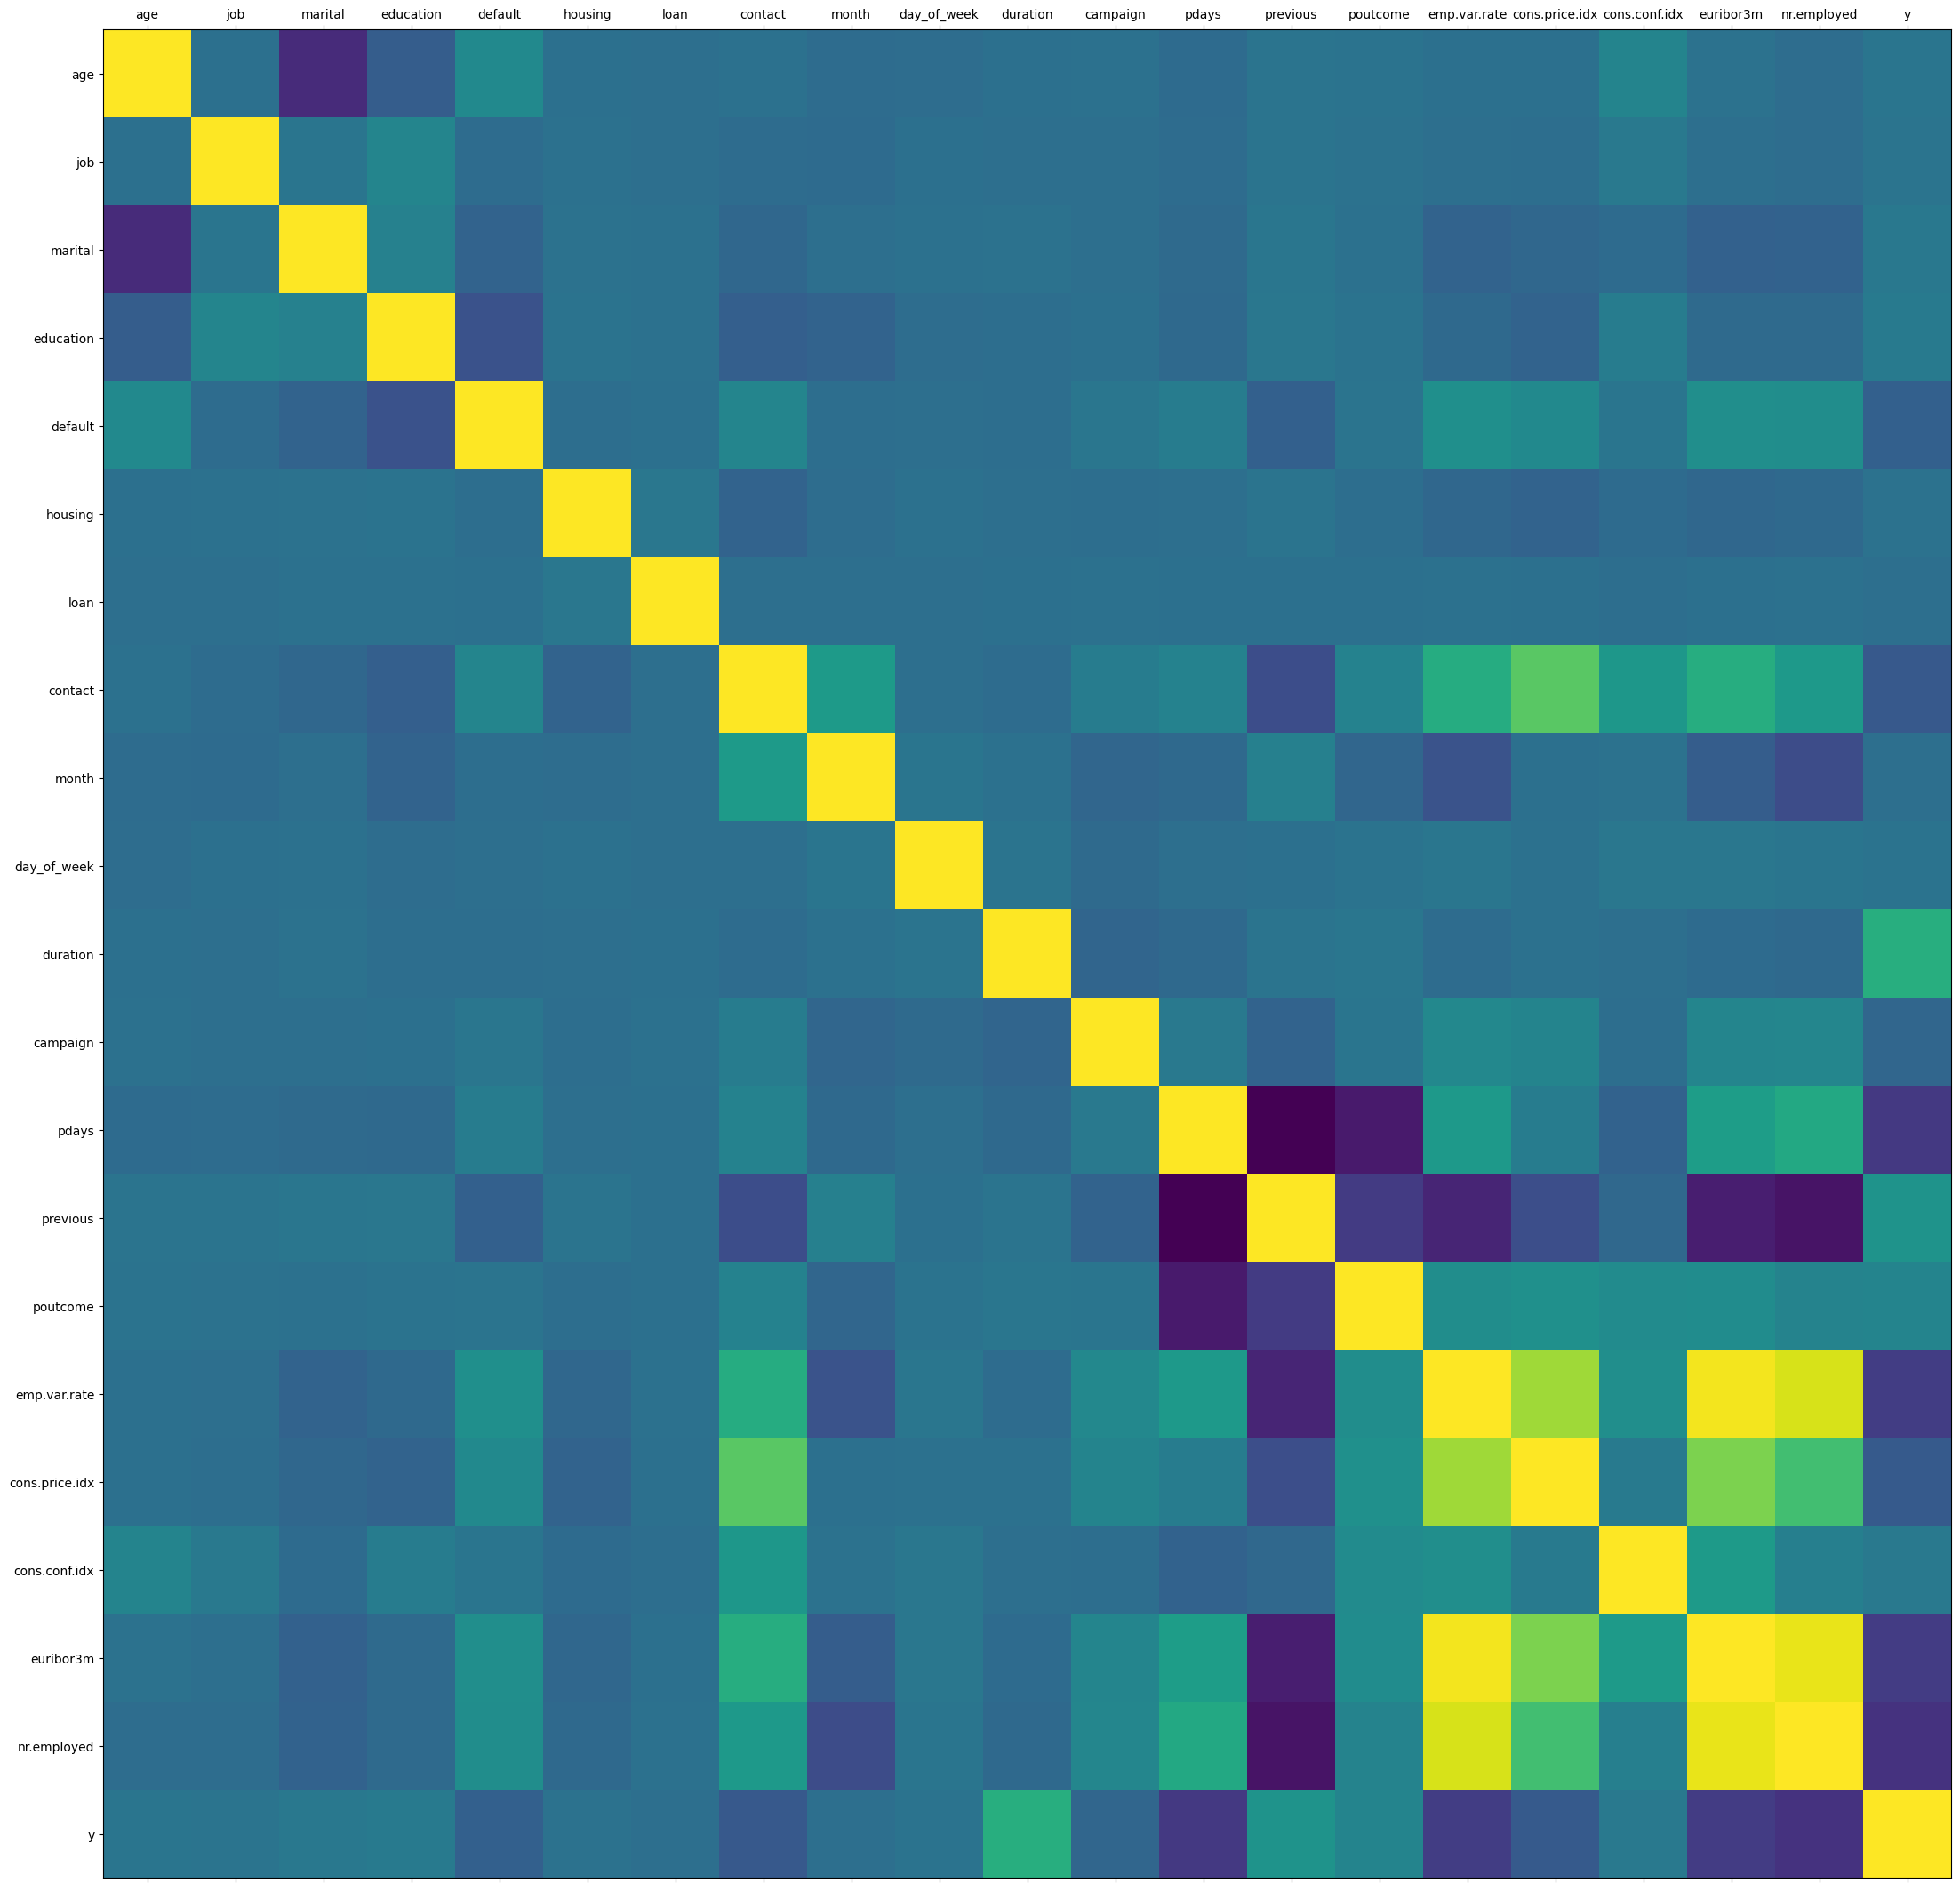

In [78]:
plot_corr(scale_df)

Berdasarkan visualisasi di atas, apabila ada relasi maka warna kotaknya akan berubah menjadi kuning. Kotak berwarna kuning yang diagonal merupakan hal yang normal, namun ada kotak berwarna kuning di luar diagonal yang artinya ada data yang sama atau terjadi redundansi data dan dapat diperiksa menggunakan `scale_df.corr()`.

In [79]:
scale_df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,-0.000866,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006490,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,0.010290,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,-0.015102,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,-0.011794,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.007658,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000916,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.026657,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,0.003690,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


Menghapus beberapa kolom yang sedikit berelasi dengan kolom y dan kolom yang memiliki nilai data yang sama.

In [80]:
scale_df.drop(columns=['euribor3m', 'nr.employed', 'cons.price.idx', 'default', 'loan', 'month', 'campaign'], inplace=True)
scale_df.head()

,age,job,marital,education,housing,contact,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,1.533034,3,1,0,0,1,1,0.010471,0.195414,-0.349494,1,0.648092,0.886447,0
1,1.628993,7,1,3,0,1,1,-0.421501,0.195414,-0.349494,1,0.648092,0.886447,0
2,-0.290186,7,1,3,2,1,1,-0.124520,0.195414,-0.349494,1,0.648092,0.886447,0
3,-0.002309,0,1,1,0,1,1,-0.413787,0.195414,-0.349494,1,0.648092,0.886447,0
4,1.533034,7,1,3,0,1,1,0.187888,0.195414,-0.349494,1,0.648092,0.886447,0


Memastikan ulang apakah masih ada kolom yang berelasi.

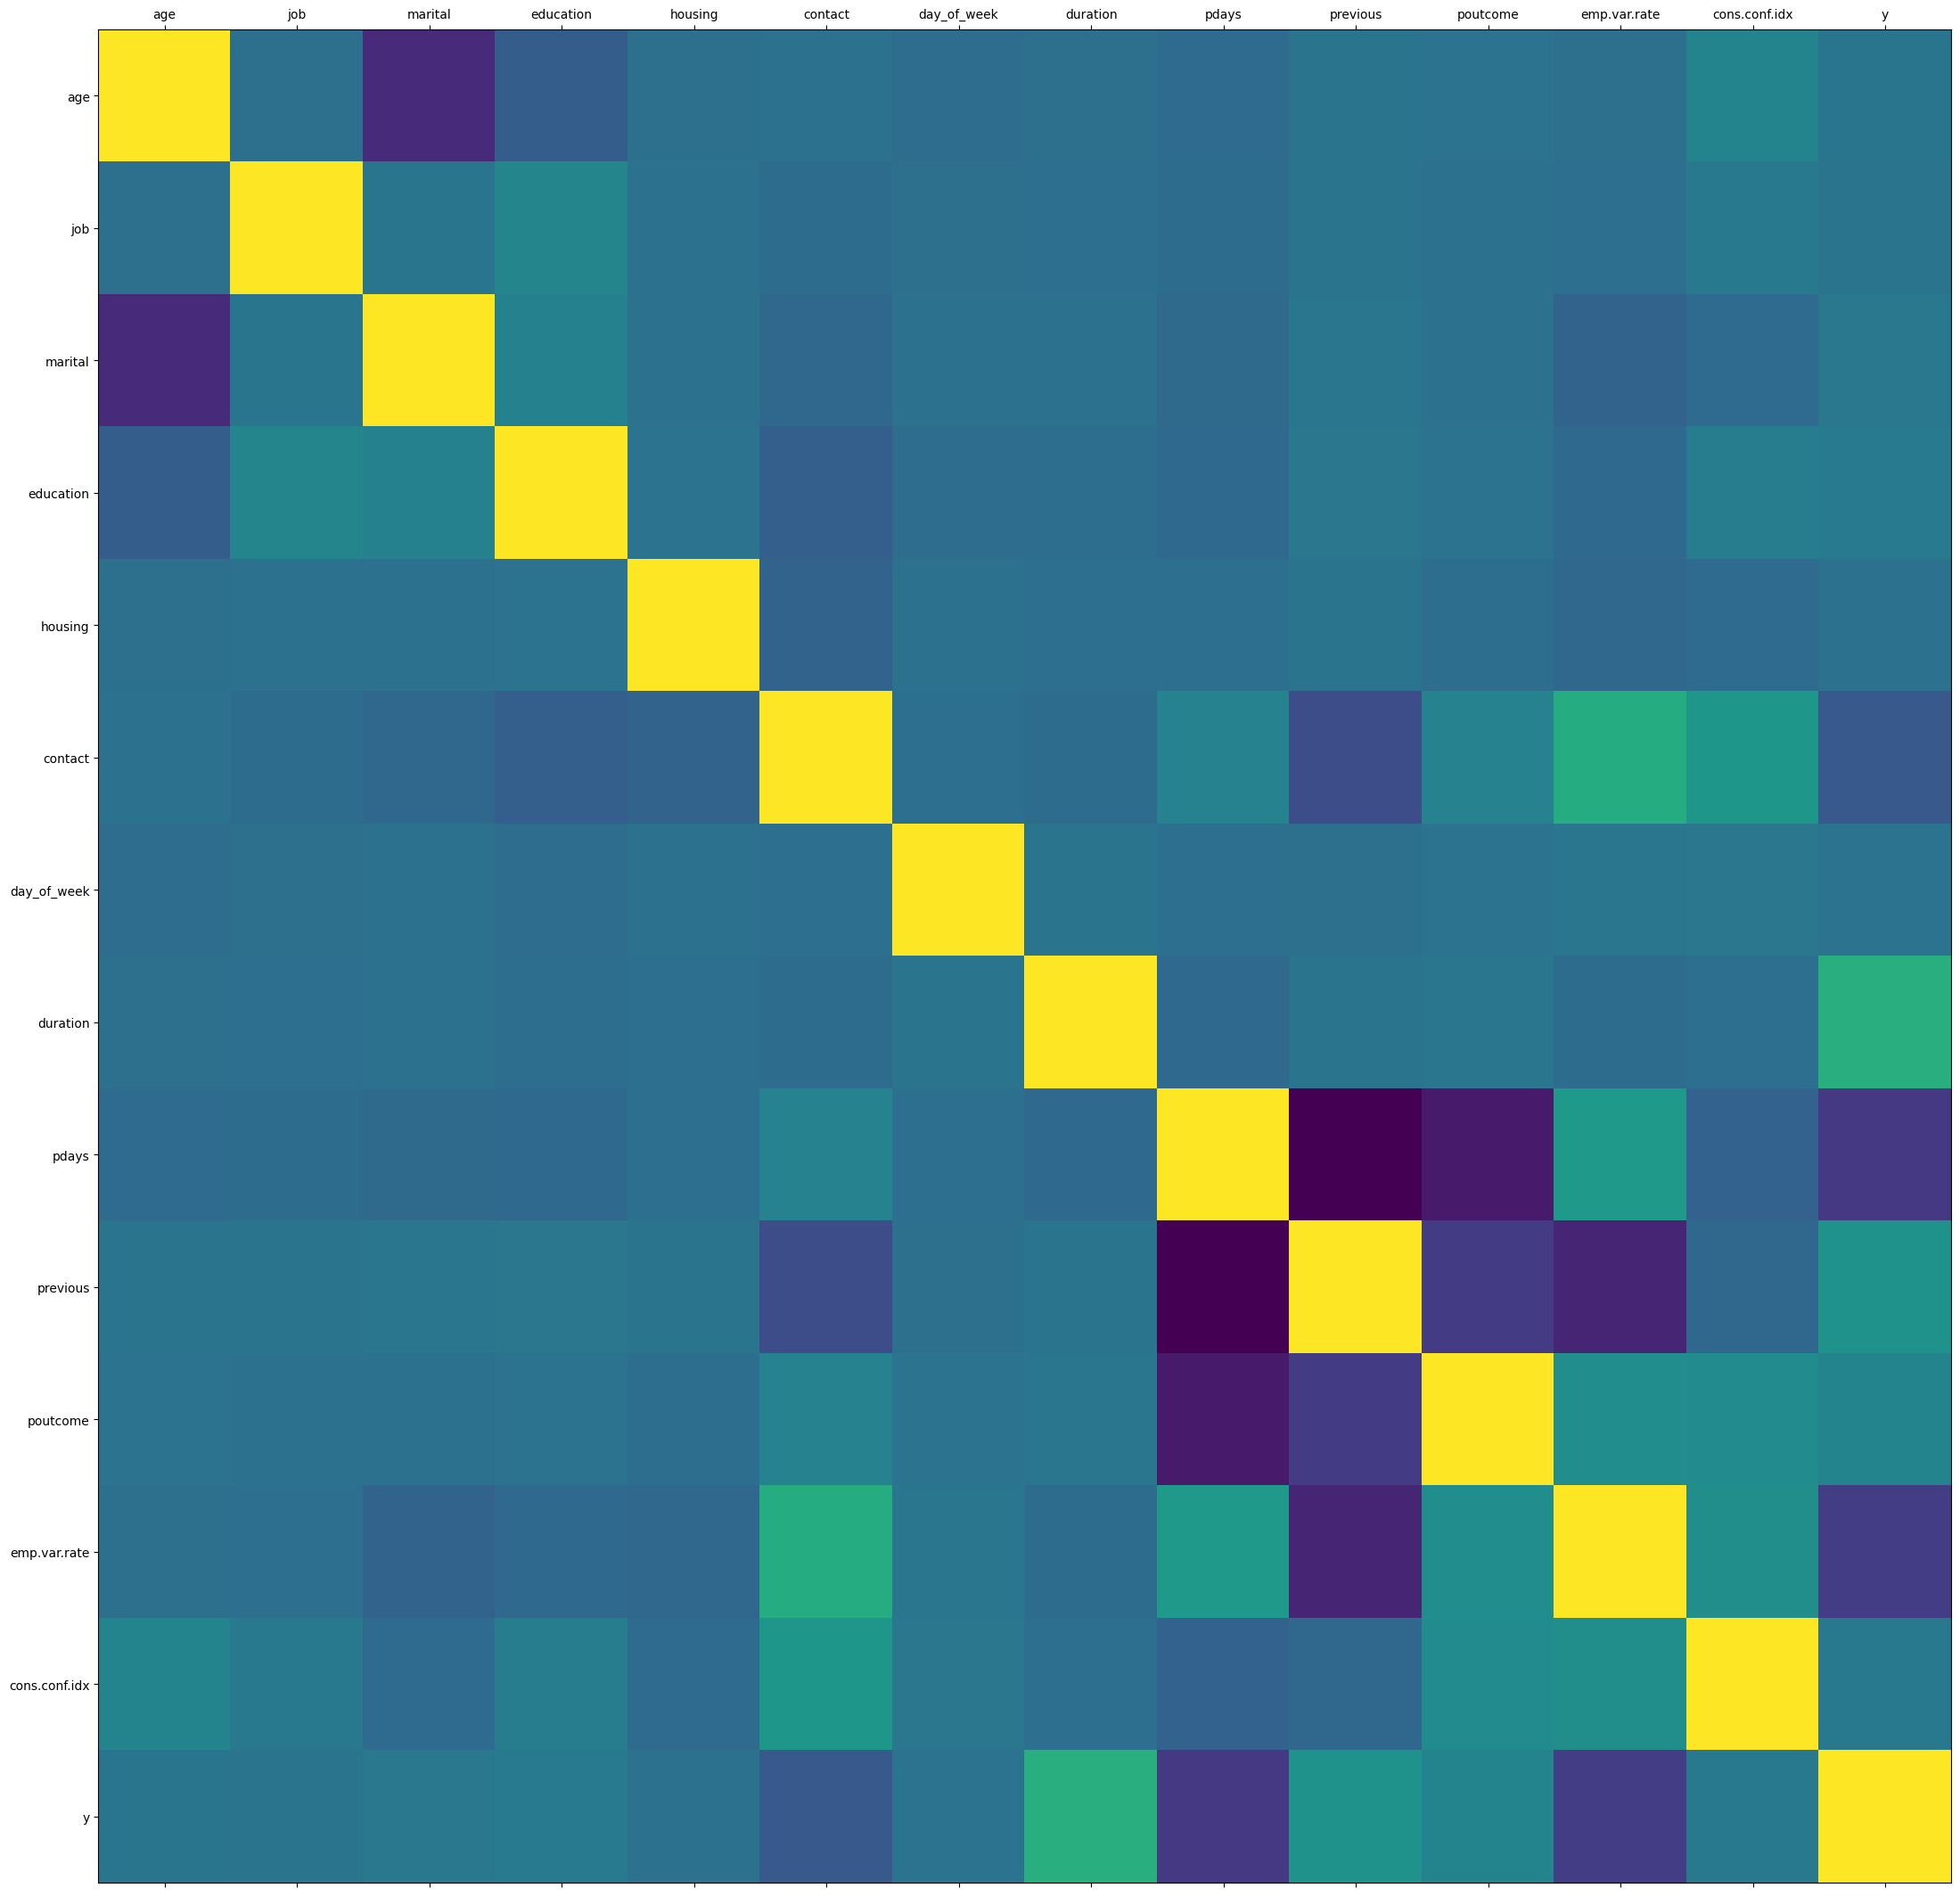

In [81]:
plot_corr(scale_df)

Sekarang sudah tidak ada lagi kolom yang saling berelasi. Selanjutnya, membagi kumpulan data yang kita kerjakan menjadi dua subkumpulan. Subkumpulan tersebut adalah training set dan test set. Pembagian ini biasanya dilakukan secara acak.

In [82]:
X = scale_df.drop(columns=['y'])
y = scale_df.y
split_test_size = 0.30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=split_test_size, random_state=13)

In [83]:
print('{0:0.2f}% ada pada training set'.format((len(X_train)/len(scale_df.index)) * 100.0))
print('{0:0.2f}% ada pada test set'.format((len(X_test)/len(scale_df.index)) * 100.0))

70.00% ada pada training set
30.00% ada pada test set


In [84]:
print("Jumlah Original Deposit Bank Berlangganan : {0} ({1:2.2f}%)".format(len(scale_df.loc[scale_df['y'] == 1]), (len(scale_df.loc[scale_df['y'] == 1])/len(scale_df.index) * 100.0)))
print("Jumlah Original Deposit Bank Tidak Berlangganan : {0} ({1:2.2f}%)".format(len(scale_df.loc[scale_df['y'] == 0]), (len(scale_df.loc[scale_df['y'] == 0])/len(scale_df.index) * 100.0)))

print('Training True : {0} ({1:2.2f}%)'.format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print('Training False : {0} ({1:2.2f}%)'.format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)* 100.0)))
print('Testing True : {0} ({1:2.2f}%)'.format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print('Testing False : {0} ({1:2.2f}%)'.format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Jumlah Original Deposit Bank Berlangganan : 4640 (11.27%)
Jumlah Original Deposit Bank Tidak Berlangganan : 36548 (88.73%)
Training True : 3260 (11.31%)
Training False : 25571 (88.69%)
Testing True : 1380 (11.17%)
Testing False : 10977 (88.83%)


## Modelling

### Logistic Regression

Membuat model Logistic Regression.

In [85]:
model_logistic_regression = LogisticRegression()

Model training.

In [86]:
model_logistic_regression.fit(X_train, y_train)

LogisticRegression()

Mendapatkan predicted outputs Logistic Regression dengan `.predict()`:

In [87]:
y_pred_logistic_regression = model_logistic_regression.predict(X_test)

Variabel y_pred_logistic_regression sekarang terikat ke array predicted outputs. Perhatikan bahwa kita menggunakan x_test sebagai argumen di sini.  
Mendapatkan akurasi logistic regression.

In [88]:
accuracy_score_logistic_regression = accuracy_score(y_test,y_pred_logistic_regression)

In [89]:
print('Akurasi untuk Logistic Regression:', accuracy_score_logistic_regression)

Akurasi untuk Logistic Regression: 0.9054786760540584


### K-Nearest Neighbors

Membuat model pengklasifikasi KNN untuk k = 3.

In [90]:
model_knn = KNeighborsClassifier(n_neighbors=3) 

Model training.

In [91]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Mendapatkan predicted outputs KNN dengan `.predict()`:

In [92]:
y_pred_knn = model_knn.predict(X_test)

Mendapatkan akurasi KNN.

In [93]:
accuracy_score_knn = accuracy_score(y_test,y_pred_knn)

In [94]:
print('Akurasi untuk K-Nearest Neighbors:', accuracy_score_knn)

Akurasi untuk K-Nearest Neighbors: 0.8969005422028


### Support Vector Machine

Membuat model SVM.

In [95]:
model_svm = SVC(kernel='linear')

Model training.

In [96]:
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

Mendapatkan predicted outputs SVM dengan `.predict()`:

In [97]:
y_pred_svm = model_svm.predict(X_test)

Mendapatkan akurasi SVM.

In [98]:
accuracy_score_svm = accuracy_score(y_test,y_pred_svm)

In [99]:
print('Akurasi untuk Support Vector Machine:', accuracy_score_svm)

Akurasi untuk Support Vector Machine: 0.9000566480537348


### Decision Tree

Membuat model Decision Tree.

In [100]:
model_decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)

Model training.

In [101]:
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

Mendapatkan predicted outputs Decision Tree dengan `.predict()`:

In [102]:
y_pred_decision_tree = model_decision_tree.predict(X_test)

Mendapatkan akurasi Decision Tree.

In [103]:
accuracy_score_decision_tree = accuracy_score(y_test,y_pred_svc)

In [104]:
print('Akurasi untuk Decision Tree:', accuracy_score_decision_tree)

Akurasi untuk Decision Tree: 0.9000566480537348


Visualisasi Decision Tree.

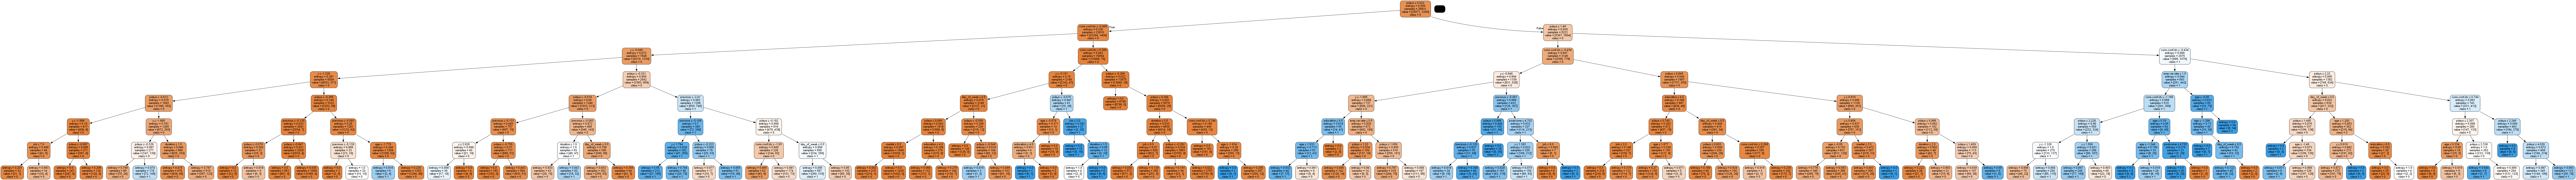

In [105]:
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

feature_cols = ['age', 'job', 'marital', 'education', 'housing', 'day_of_week', 'duration', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'y']

dot_data = StringIO()
tree.export_graphviz(model_decision_tree, 
    out_file=dot_data, 
    class_names=['0','1'], # the target names.
    feature_names=feature_cols, # the feature names.
    filled=True, # Whether to fill in the boxes with colours.
    rounded=True, # Whether to round the corners of the boxes.
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### Random Forest

Membuat model Random Forest.

In [106]:
model_random_forest = RandomForestClassifier()

Model training.

In [107]:
model_random_forest.fit(X_train, y_train)

RandomForestClassifier()

Mendapatkan predicted outputs Random Forest dengan `.predict()`:

In [108]:
y_pred_random_forest = model_random_forest.predict(X_test)

Mendapatkan akurasi Random Forest.

In [109]:
accuracy_score_random_forest = accuracy_score(y_test,y_pred_random_forest)

In [110]:
print('Akurasi untuk Random Forest:', accuracy_score_random_forest)

Akurasi untuk Random Forest: 0.9124382940843246


### Naive Bayes

Membuat model Naive Bayes.

In [111]:
model_naive_bayes = GaussianNB()

Model training.

In [112]:
model_naive_bayes.fit(X_train, y_train)

GaussianNB()

Mendapatkan predicted outputs Naive Bayes dengan `.predict()`:

In [113]:
y_pred_naive_bayes = model_naive_bayes.predict(X_test)

Mendapatkan akurasi Naive Bayes.

In [114]:
accuracy_score_naive_bayes = accuracy_score(y_test,y_pred_naive_bayes)

In [115]:
print('Akurasi untuk Naive Bayes:', accuracy_score_naive_bayes)

Akurasi untuk Naive Bayes: 0.8791777939629359


### Confusion Matrix

#### Logistic Regression CM

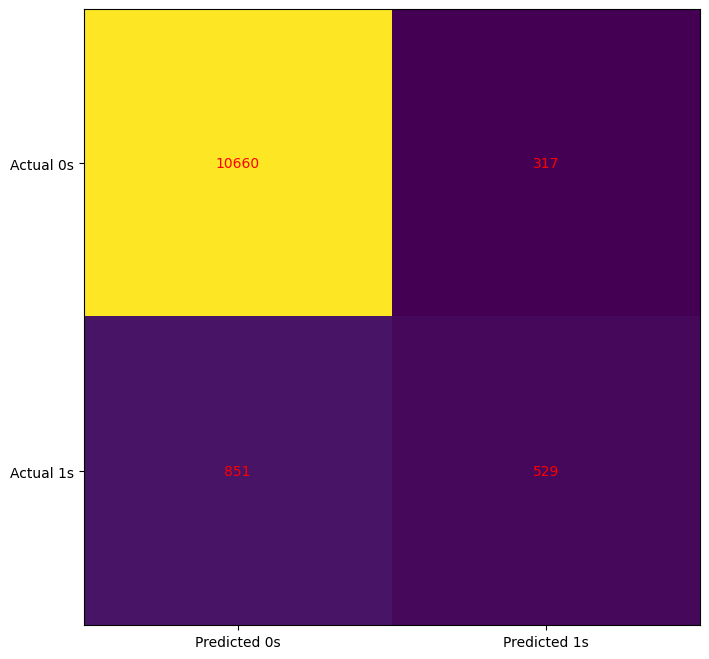

In [116]:
logistic_regression_cm = confusion_matrix(y_test, y_pred_logistic_regression)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(logistic_regression_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, logistic_regression_cm[i, j], ha='center', va='center', color='red')
plt.show()

#### K-Nearest Neighbors CM

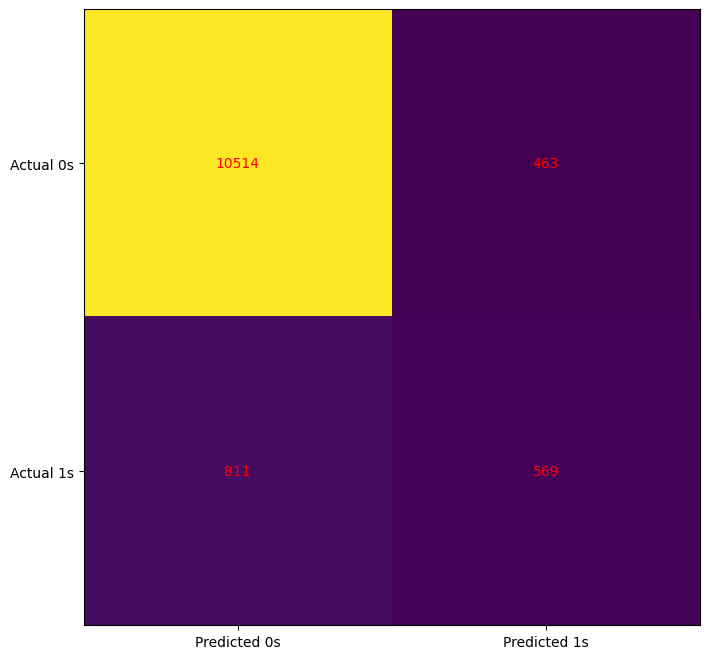

In [117]:
knn_cm = confusion_matrix(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(knn_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, knn_cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Support Vector Machine CM

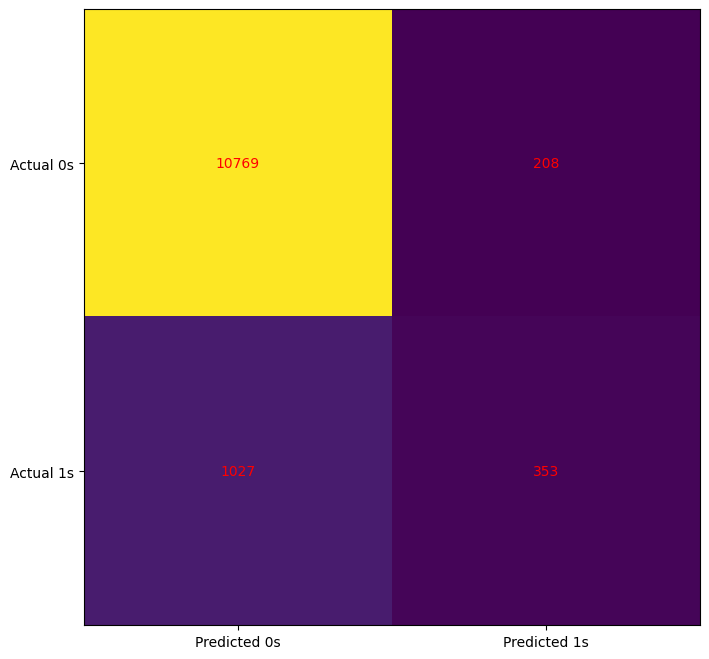

In [118]:
svm_cm = confusion_matrix(y_test, y_pred_svm)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(svm_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, svm_cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Decision Tree CM

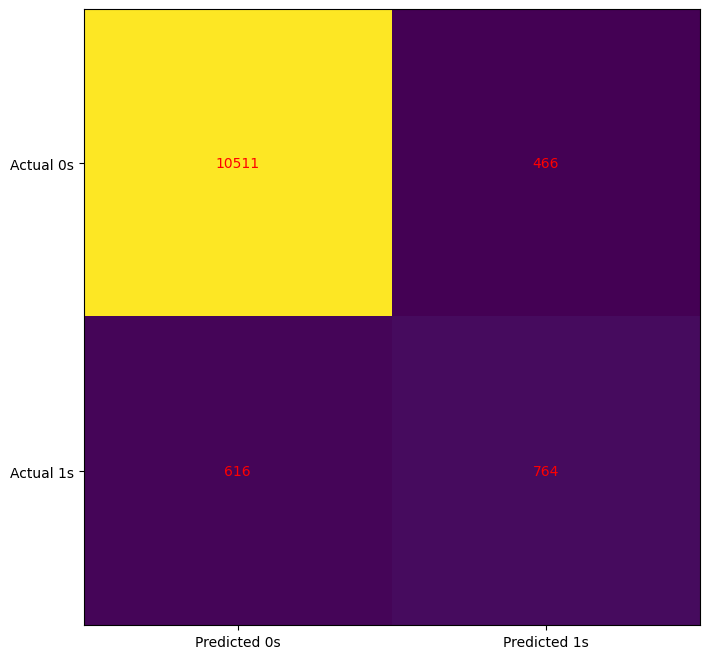

In [120]:
decision_tree_cm = confusion_matrix(y_test, y_pred_decision_tree)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(decision_tree_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, decision_tree_cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Random Forest CM

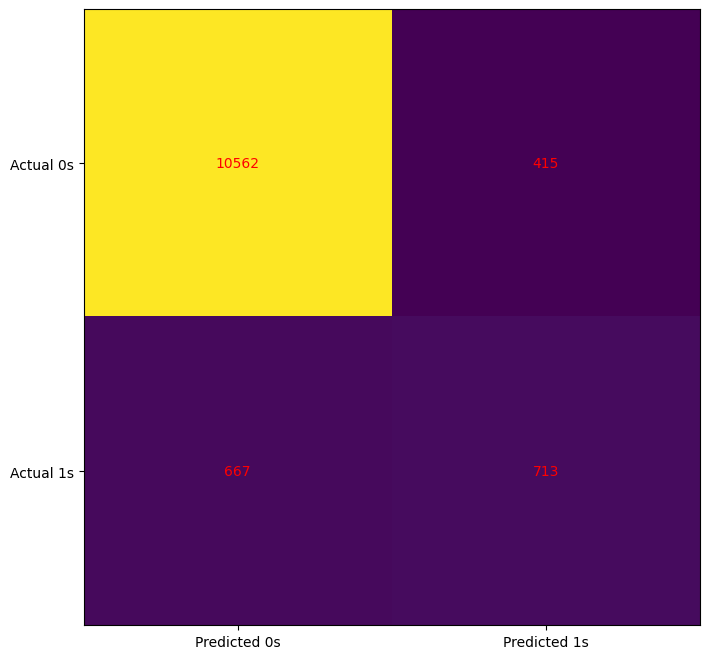

In [121]:
random_forest_cm = confusion_matrix(y_test, y_pred_random_forest)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(random_forest_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, random_forest_cm[i, j], ha='center', va='center', color='red')
plt.show()

#### Naive Bayes CM

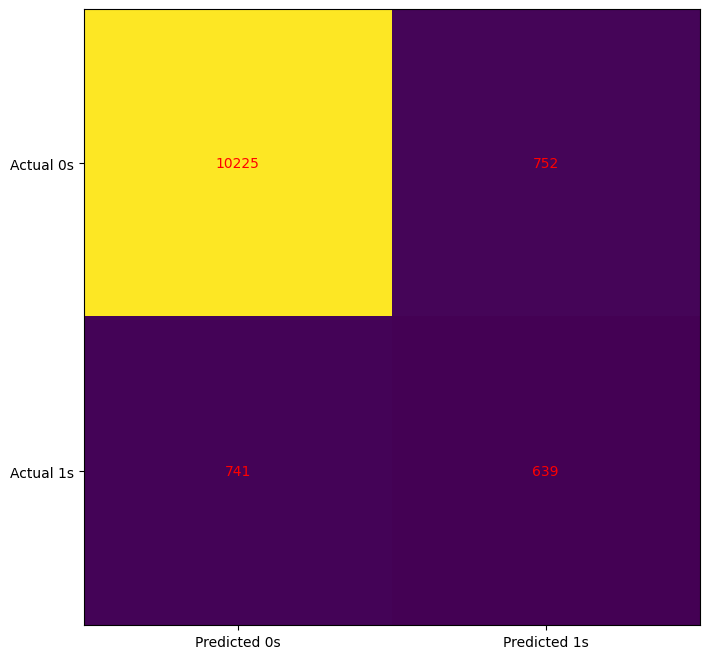

In [122]:
naive_bayes_cm = confusion_matrix(y_test, y_pred_naive_bayes)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(naive_bayes_cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, naive_bayes_cm[i, j], ha='center', va='center', color='red')
plt.show()

## Kesimpulan

In [119]:
# Hasil akurasi dari beberapa model
print('Berikut adalah hasil beberapa akurasi dari model machine learning')
print('Akurasi untuk Logistic Regression:', accuracy_score_logistic_regression)
print('Akurasi untuk K-Nearest Neighbors:', accuracy_score_knn)
print('Akurasi untuk Support Vector Machine:', accuracy_score_svm)
print('Akurasi untuk Decision Tree:', accuracy_score_decision_tree)
print('Akurasi untuk Random Forest:', accuracy_score_random_forest)
print('Akurasi untuk Naive Bayes:', accuracy_score_naive_bayes)

Berikut adalah hasil beberapa akurasi dari model machine learning
Akurasi untuk Logistic Regression: 0.9054786760540584
Akurasi untuk K-Nearest Neighbors: 0.8969005422028
Akurasi untuk Support Vector Machine: 0.9000566480537348
Akurasi untuk Decision Tree: 0.9000566480537348
Akurasi untuk Random Forest: 0.9124382940843246
Akurasi untuk Naive Bayes: 0.8791777939629359


Berdasarkan hasil akurasi, maka algoritma yang paling sesuai untuk memprediksi apakah klien akan berlangganan atau tidak adalah algoritma **Random Forest**.